In [1]:
# These two lines allow for the notebook to automatically update to use the most
# up-to-date versions of the code being imported
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from pyphotonicsims.components.elements import *
from pyphotonicsims.box_integration import get_box_path
import h5py

# plt.style.available
%matplotlib inline
plt.style.use('science')
plt.rcParams['figure.figsize'] = [4,3]

## Directional coupler
 - Coupling power
 $$\kappa = \sin{\frac{\pi \delta n L_c}{\lambda}}$$
 - Coupling rate for resonator
 $$\gamma_{ex} = \frac{c\log{1/(1-\kappa^2)}}{n_g L}$$

(0.0, 10.0)

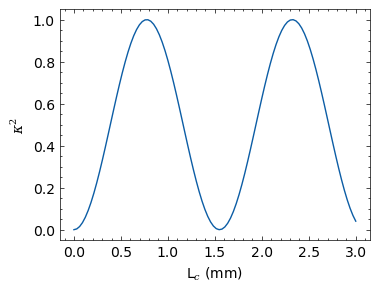

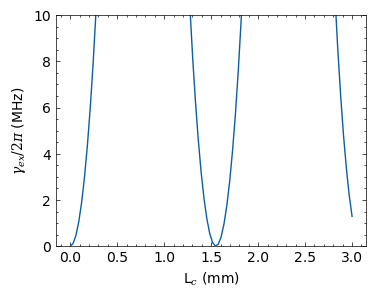

In [2]:
dn = 0.001
L = 1.0
ng = 1.53
wl = 1550e-9
Lc = np.linspace(0, 3e-3, 100)
ka2 = directional_coupler(dn, Lc, wl)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(Lc*1e3, ka2)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\kappa^2$')

plt.figure()
plt.plot(Lc*1e3, r_ex)
plt.xlabel(r'L$_c$ (mm)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.ylim((0, 10))

### 1550 nm 6 $\mu$m by 80 nm waveguide coupling $\delta n_{eff} $simulations

In [3]:
base_path = 'Simulations/lumerical mode/coupler/6um by 80nm waveguide'
filename = 'coupling_data_1550nm_6umby80nm_sweep_gap_0um_to_6um.mat'
filepath = get_box_path(base_path, filename)
f = h5py.File(filepath, 'r')
dneff = f['dneff'][:]
gapx = f['gap_list'][0]
dneff.shape

(8, 58)

### (1.1) 1550 nm 6 $\mu$m by 80 nm waveguide coupling simulation and design testing and validation
 - mask `RC_T_v3.gsd`, 80 nm thick SiN, non-RDO process
 - ring radius 8.530 mm, gap 3.5 𝜇m
 - coupling simulation assumes Lx = 0.3 mm
  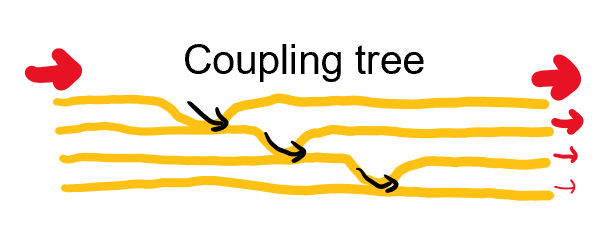
  
  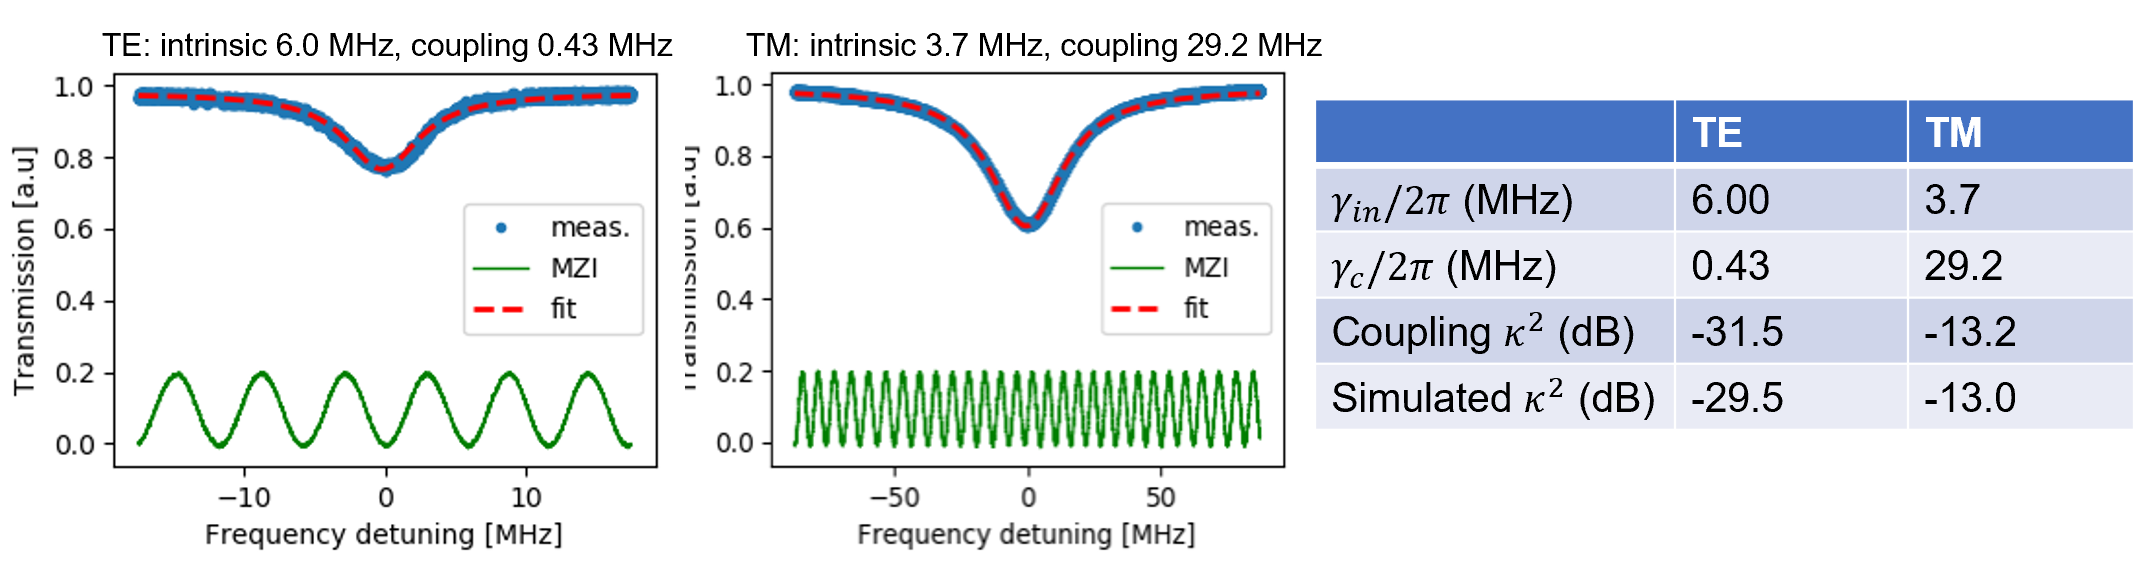

(0.1, 100)

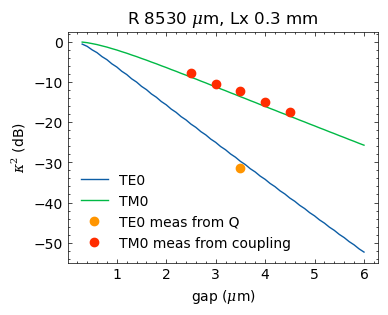

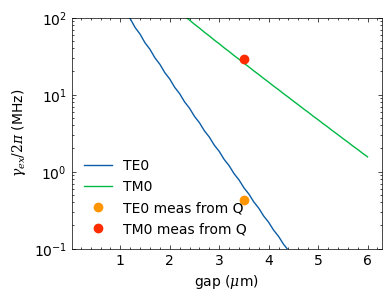

In [4]:
wl = 1550e-9
ng = 1.53
Lx = 0.3e-3
L = 2*np.pi*8530e-6

WG_mode_dir = {'TE0': 0, 'TE1': 1, 'TM0': 2, 'TM1': 3}
mode_list = ['TE0', 'TM0']
mode_ind = [WG_mode_dir[mode] for mode in mode_list]
ka2 = directional_coupler(dneff[mode_ind, :], Lx, wl)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(gapx*1e6, 10*np.log10(ka2.T))
plt.plot(3.5,-31.5,'o',[2.5,3,3.5,4,4.5],[-7.76,-10.42,-12.35,-15.02,-17.50],'o');
plt.xlabel(r'gap ($\mu$m)')
plt.ylabel(r'$\kappa^2$ (dB)')
plt.legend(mode_list + ['TE0 meas from Q', 'TM0 meas from coupling'])
plt.title(r'R 8530 $\mu$m, Lx ' + f'{Lx*1e3:.1f} mm')

plt.figure()
plt.semilogy(gapx*1e6, r_ex.T)
plt.semilogy(3.5, 0.43, 'o', 3.5, 29.2, 'o')
plt.xlabel(r'gap ($\mu$m)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.legend(mode_list + ['TE0 meas from Q', 'TM0 meas from Q'])
plt.ylim((0.1, 100))

### (1.2) Radius 2710 $\mu$m SBS resonator $\gamma_{ex}$ by sweeping gap with fixed Lx

(0.1, 100)

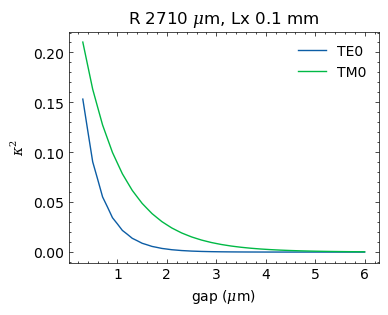

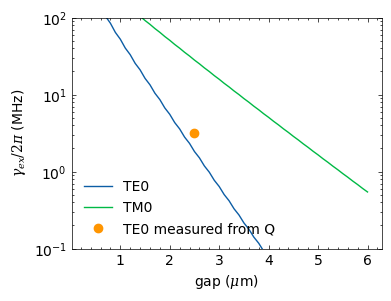

In [5]:
wl = 1550e-9
ng = 1.53
Lx = 0.1e-3
L = 2*np.pi*2710e-6

WG_mode_dir = {'TE0': 0, 'TE1': 1, 'TM0': 2, 'TM1': 3}
mode_list = ['TE0', 'TM0']
mode_ind = [WG_mode_dir[mode] for mode in mode_list]
ka2 = directional_coupler(dneff[mode_ind, :], Lx, wl)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(gapx*1e6, ka2.T)
plt.xlabel(r'gap ($\mu$m)')
plt.ylabel(r'$\kappa^2$')
plt.legend(mode_list)
plt.title(r'R 2710 $\mu$m, Lx ' + f'{Lx*1e3:.1f} mm')

plt.figure()
plt.semilogy(gapx*1e6, r_ex.T)
plt.semilogy(2.5, 3.2, 'o')
plt.xlabel(r'gap ($\mu$m)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.legend(mode_list + ['TE0 measured from Q'], loc = 'lower left')
plt.ylim((0.1, 100))

### (2.1) Evaluate $\kappa^2$ by sweeping Lx at gap 1.0 $\mu$m

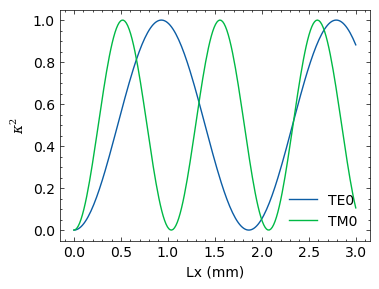

In [6]:
gap = 1.0e-6
ind_gap = np.argmin(np.abs(gapx - gap))
Lx_sweep = np.linspace(0, 3e-3, 200)

ka2 = np.array([directional_coupler(dneff[ii, ind_gap], Lx_sweep, wl) for ii in mode_ind])
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(Lx_sweep*1e3, ka2.T)
plt.xlabel(r'Lx (mm)')
plt.ylabel(r'$\kappa^2$')
plt.legend(mode_list)

# plt.figure()
# plt.plot(Lx_sweep*1e3, r_ex.T)
# plt.xlabel(r'Lx (mm)')
# plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
# plt.legend(mode_list)
# plt.ylim((0, 100))

### (2.2) Evaluate $\kappa^2$ by sweeping Lx at gap 2.0 $\mu$m

0.0002713901337696623

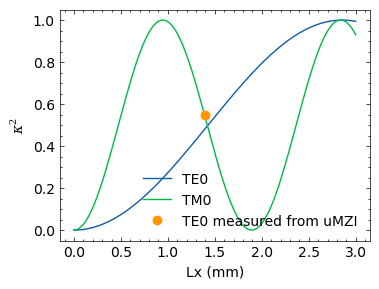

In [7]:
gap = 2.0e-6
ind_gap = np.argmin(np.abs(gapx - gap))
Lx_sweep = np.linspace(0, 3e-3, 200)

ka2 = np.array([directional_coupler(dneff[ii, ind_gap], Lx_sweep, wl) for ii in mode_ind])
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(Lx_sweep*1e3, ka2.T)
plt.plot(1.4, 0.55, 'o')
plt.xlabel(r'Lx (mm)')
plt.ylabel(r'$\kappa^2$')
plt.legend(mode_list + ['TE0 measured from uMZI'], loc='lower right')

# plt.figure()
# plt.plot(Lx_sweep*1e3, r_ex.T)
# plt.xlabel(r'Lx (mm)')
# plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
# plt.legend(mode_list)
# plt.ylim((0, 20))

### (2.3) Evaluate $\kappa^2$ by sweeping Lx at gap 2.5 $\mu$m

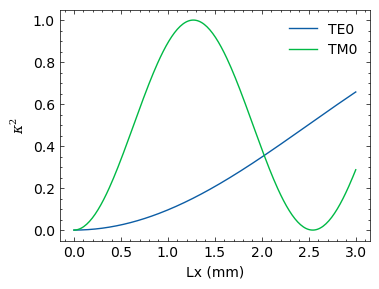

In [8]:
gap = 2.5e-6
ind_gap = np.argmin(np.abs(gapx - gap))
Lx_sweep = np.linspace(0, 3e-3, 200)

ka2 = np.array([directional_coupler(dneff[ii, ind_gap], Lx_sweep, wl) for ii in mode_ind])
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

plt.figure()
plt.plot(Lx_sweep*1e3, ka2.T)
plt.xlabel(r'Lx (mm)')
plt.ylabel(r'$\kappa^2$')
plt.legend(mode_list)

# plt.figure()
# plt.plot(Lx_sweep*1e3, r_ex.T)
# plt.xlabel(r'Lx (mm)')
# plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
# plt.legend(mode_list)
# plt.ylim((0, 20))

### (3.1) Radius 1 mm add-drop filter resonator $\gamma_{ex}$ by sweeping gap with fixed Lx

(1, 10000)

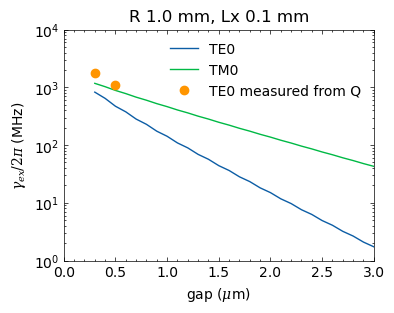

In [10]:
wl = 1550e-9
ng = 1.53
Lx = 0.1e-3
L = 2*np.pi*1e-3

WG_mode_dir = {'TE0': 0, 'TE1': 1, 'TM0': 2, 'TM1': 3}
mode_list = ['TE0', 'TM0']
mode_ind = [WG_mode_dir[mode] for mode in mode_list]
ka2 = directional_coupler(
    dneff[mode_ind, :], Lx, wl)
r_ex = cavity_coupling_rate(ka2, ng, L)/(2*np.pi*1e6)

# plt.figure()
# # plt.plot(gapx*1e6, 10*np.log10(ka2.T))
# plt.plot(gapx*1e6, (ka2.T))
# plt.xlabel(r'gap ($\mu$m)')
# plt.ylabel(r'$\kappa^2$')
# plt.legend(mode_list)
# plt.title(r'R 1.0 mm, Lx ' + f'{Lx*1e3:.1f} mm')
# plt.xlim((1, 3))

plt.figure()
plt.semilogy(gapx*1e6, r_ex.T)
plt.semilogy([0.3, 0.5], [3528/2, 2232/2], 'o')
plt.xlabel(r'gap ($\mu$m)')
plt.ylabel(r'$\gamma_{ex}/2\pi$ (MHz)')
plt.title(r'R 1.0 mm, Lx ' + f'{Lx*1e3:.1f} mm')
plt.legend(mode_list + ['TE0 measured from Q'])
plt.xlim((0, 3))
plt.ylim((1, 10000))